# Working With Data 3

## V41 Groupby on DataFrames

In [2]:
import numpy as np
import pandas as pd
from pandas import Series , DataFrame 

In [5]:
dframe=DataFrame({'k1':list("XXYYZ"),
                 'k2':['alpha','beta','alpha','beta','alpha'],
                 'dataset1':np.random.randn(5),
                 'dataset2':np.random.randn(5)})
dframe

,k1,k2,dataset1,dataset2
0,X,alpha,0.905669,-0.915469
1,X,beta,0.271845,0.064685
2,Y,alpha,-1.470922,-1.305722
3,Y,beta,0.973892,-0.386883
4,Z,alpha,-0.024422,-0.455198


In [6]:
group1=dframe['dataset1'].groupby(dframe['k1'])
group1

In [7]:
group1.mean()


k1
X    0.588757
Y   -0.248515
Z   -0.024422
Name: dataset1, dtype: float64

In [10]:
cities=np.array(['NY','LA','LA','NY','NY'])
mounth=np.array(['JAN','FEB','JAN','FEB','JAN'])

In [11]:
dframe['dataset1'].groupby([cities,mounth])


In [12]:
dframe['dataset1'].groupby([cities,mounth]).mean()


LA  FEB    0.271845
    JAN   -1.470922
NY  FEB    0.973892
    JAN    0.440623
Name: dataset1, dtype: float64

In [13]:
dframe


,k1,k2,dataset1,dataset2
0,X,alpha,0.905669,-0.915469
1,X,beta,0.271845,0.064685
2,Y,alpha,-1.470922,-1.305722
3,Y,beta,0.973892,-0.386883
4,Z,alpha,-0.024422,-0.455198


In [15]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,0.588757,-0.425392
Y,-0.248515,-0.846302
Z,-0.024422,-0.455198


In [16]:
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.905669 -0.915469
   beta   0.271845  0.064685
Y  alpha -1.470922 -1.305722
   beta   0.973892 -0.386883
Z  alpha -0.024422 -0.455198

In [17]:
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [25]:
for name , group in dframe.groupby('k1'):
    print ("This is the %s group" %name)
    print (group )
    print ('\n')

This is the X group
  k1     k2  dataset1  dataset2
0  X  alpha  0.905669 -0.915469
1  X   beta  0.271845  0.064685


This is the Y group
  k1     k2  dataset1  dataset2
2  Y  alpha -1.470922 -1.305722
3  Y   beta  0.973892 -0.386883


This is the Z group
  k1     k2  dataset1  dataset2
4  Z  alpha -0.024422 -0.455198




In [26]:
for c , s in dframe.groupby('k1'):
    print ("This is the %s group" %c)
    print (s )
    print ('\n')

This is the X group
  k1     k2  dataset1  dataset2
0  X  alpha  0.905669 -0.915469
1  X   beta  0.271845  0.064685


This is the Y group
  k1     k2  dataset1  dataset2
2  Y  alpha -1.470922 -1.305722
3  Y   beta  0.973892 -0.386883


This is the Z group
  k1     k2  dataset1  dataset2
4  Z  alpha -0.024422 -0.455198




# ?????? 

In [30]:
for (k1,k2) ,group in dframe.groupby(['k1','k2']):
    print ("key1=%s key2= %s" %(k1,k2))
    print (group)
    print('\n')

key1=X key2= alpha
  k1     k2  dataset1  dataset2
0  X  alpha  0.905669 -0.915469


key1=X key2= beta
  k1    k2  dataset1  dataset2
1  X  beta  0.271845  0.064685


key1=Y key2= alpha
  k1     k2  dataset1  dataset2
2  Y  alpha -1.470922 -1.305722


key1=Y key2= beta
  k1    k2  dataset1  dataset2
3  Y  beta  0.973892 -0.386883


key1=Z key2= alpha
  k1     k2  dataset1  dataset2
4  Z  alpha -0.024422 -0.455198




In [31]:
group_dict=dict(list(dframe.groupby('k1')))
group_dict

{'X':   k1     k2  dataset1  dataset2
 0  X  alpha  0.905669 -0.915469
 1  X   beta  0.271845  0.064685, 'Y':   k1     k2  dataset1  dataset2
 2  Y  alpha -1.470922 -1.305722
 3  Y   beta  0.973892 -0.386883, 'Z':   k1     k2  dataset1  dataset2
 4  Z  alpha -0.024422 -0.455198}

In [33]:
group_dict['X']

,k1,k2,dataset1,dataset2
0,X,alpha,0.905669,-0.915469
1,X,beta,0.271845,0.064685


In [40]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))
group_dict_axis1

#actually  the axis 1 indicates the datas inside the table 
# i think axis 0 will indicate the rows and because of that
#ther is no datatype for rows

{dtype('float64'):    dataset1  dataset2
 0  0.905669 -0.915469
 1  0.271845  0.064685
 2 -1.470922 -1.305722
 3  0.973892 -0.386883
 4 -0.024422 -0.455198, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [35]:
dframe

,k1,k2,dataset1,dataset2
0,X,alpha,0.905669,-0.915469
1,X,beta,0.271845,0.064685
2,Y,alpha,-1.470922,-1.305722
3,Y,beta,0.973892,-0.386883
4,Z,alpha,-0.024422,-0.455198


In [41]:
group_dict_axis0 = dict(list(dframe.groupby(dframe.dtypes,axis=0)))
group_dict_axis0

{}

In [45]:
dataset2_group= dframe.groupby(['k1','k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha -0.915469
   beta   0.064685
Y  alpha -1.305722
   beta  -0.386883
Z  alpha -0.455198

## V42 Groupby on Dict and Series

In [46]:
animals=DataFrame(np.arange(16).reshape(4,4),
                 columns=['W','X','Y','Z'],
                 index=['Dog','Cat','Bird','Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [47]:
animals.ix[1:2,['W','Y']]=np.nan
animals

/Users/raka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [48]:
behavior_map={'W':'good','X':'bad','Y':'good','Z':'bad'}

In [49]:
behavior_map

{'W': 'good', 'X': 'bad', 'Y': 'good', 'Z': 'bad'}

In [52]:
animal_col=animals.groupby(behavior_map,axis=1)
animal_col.sum()


,bad,good
Dog,4.0,2.0
Cat,12.0,0.0
Bird,20.0,18.0
Mouse,28.0,26.0


In [53]:
animal_col=animals.groupby(behavior_map,axis=0)
animal_col.sum()


,W,X,Y,Z


In [54]:
behav_series=Series(behavior_map)
behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [55]:
animals.groupby(behav_series,axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [56]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [57]:
#axis ::


In [58]:
animals.groupby(len).sum()
# if we don't specify the axis it takes its default value which is 0

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [59]:
animals.groupby(len,axis=1).sum()

,1
Dog,6.0
Cat,12.0
Bird,38.0
Mouse,54.0


In [62]:
animals.groupby(behav_series,axis=1).count().groupby(len).sum()

,bad,good
3,4,2
4,2,2
5,2,2


In [63]:
animals.groupby(behav_series,axis=1).count().groupby(len,axis=1).sum()

,3,4
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [64]:
# --


In [67]:
keys=list('ABAB')

In [70]:
animals.groupby([len,keys]).max()
# first it sets those keys to the DataFrame that we have 

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

In [78]:
# building hierarchical index for the dataframe
hier_col=pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],
                                    [1,2,3,1,2]],
                                  names=['City','sub_value'])
hier_col


MultiIndex(levels=[['NY', 'SF'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1], [0, 1, 2, 0, 1]],
           names=['City', 'sub_value'])

In [79]:
dframe_hr=DataFrame(np.arange(25).reshape(5,5),columns=hier_col)
dframe_hr

City       NY          SF    
sub_value   1   2   3   1   2
0           0   1   2   3   4
1           5   6   7   8   9
2          10  11  12  13  14
3          15  16  17  18  19
4          20  21  22  23  24

In [80]:
dframe_hr=dframe_hr*100
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

## V43 Aggregation

In [83]:
 # Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)

#Let's get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'


# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
dframe_wine = pd.read_csv('./documents/winequality-red.csv',sep=';')

In [85]:
dframe_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [88]:
def max_to_min(arr):
    return (arr.max()-arr.min())

In [89]:
wino = dframe_wine.groupby('quality')
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [90]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [91]:
wino.sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,83.6,8.845,1.71,26.35,1.225,110.0,249.0,9.97464,33.98,5.70,99.550000
4,412.3,36.780,9.23,142.80,4.806,650.0,1921.0,52.81675,179.22,31.61,544.050000
5,5561.9,392.965,165.95,1722.15,63.153,11566.0,38486.0,679.02757,2250.67,422.88,6741.700000
6,5325.5,317.395,174.70,1580.45,54.202,10024.0,26075.0,635.84041,2116.93,430.86,6781.633333
7,1765.6,80.380,74.66,541.40,15.241,2795.0,6969.0,198.22475,654.86,147.51,2281.716667
8,154.2,7.620,7.04,46.40,1.232,239.0,602.0,17.91382,58.81,13.82,217.700000


In [92]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [93]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
dframe_wine['qual/alc ration']=dframe_wine[
    'quality']/dframe_wine['alcohol']


In [98]:
dframe_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ration
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [99]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ration,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [100]:
%matplotlib inline 

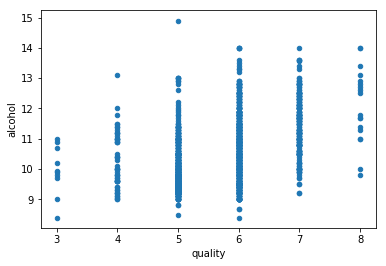

In [101]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

In [102]:
#challenge : box plot 

## V44 Split,Apply,Combine

In [139]:
dframe_wine=pd.read_csv('./documents/winequality-red.csv',sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [140]:
def ranker(df):
    df['alc_content_rank']=np.arange(len(df))+1
    return df

In [141]:
dframe_wine.sort_values('alcohol',ascending=False,inplace=True)
#sort deprecated
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6


In [142]:
dframe_wine.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [150]:
dframe_wine=dframe_wine.groupby('quality').apply(ranker)
dframe_wine
# actally in ranks step by step on the groups for example forst ranks
#the group 5 from 1 to its length +1 and then ranks gp. 3 from 1 to ... 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5,1
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8,1
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,1
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6,2
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6,3
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8,2
467,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6,4
821,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7,1
1114,5.0,0.400,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6,5
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7,2


In [151]:
dframe_wine.groupby('quality').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alc_content_rank
quality,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,5.5
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,27.0
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,341.0
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,319.5
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,100.0
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,9.5


In [155]:
num_of_qual= dframe_wine['quality'].value_counts()
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [156]:
dframe_wine['quality'].count()

1599

In [157]:
#combining:
dframe_wine[dframe_wine.alc_content_rank==1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


In [158]:
dframe_wine[dframe_wine.alc_content_rank==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


In [160]:
dframe_wine[dframe_wine.quality==5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.360,0.65,7.50,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5,1
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.00,5,2
1287,8.0,0.600,0.08,2.60,0.056,3.0,7.0,0.99286,3.22,0.37,13.00,5,3
132,5.6,0.500,0.09,2.30,0.049,17.0,99.0,0.99370,3.63,0.63,13.00,5,4
131,5.6,0.500,0.09,2.30,0.049,17.0,99.0,0.99370,3.63,0.63,13.00,5,5
1052,5.6,0.605,0.05,2.40,0.073,19.0,25.0,0.99258,3.56,0.55,12.90,5,6
1119,5.6,0.660,0.00,2.50,0.066,7.0,15.0,0.99256,3.52,0.58,12.90,5,7
1105,6.3,0.570,0.28,2.10,0.048,13.0,49.0,0.99374,3.41,0.60,12.80,5,8
1471,6.7,0.700,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.60,5,9
1186,6.6,0.800,0.03,7.80,0.079,6.0,12.0,0.99630,3.52,0.50,12.20,5,10


In [161]:
# groupby ==> for spliting and combining 

## V45  Cross Tabulation

In [163]:
from StringIO import StringIO

ModuleNotFoundError: No module named 'StringIO'

In [164]:
from io import StringIO

In [169]:
data="""\
Sample Animal Inteligence
1 Dog Smart
2 Dog Smart
3 Cat Dump 
4 Cat Dump
5 Dog Dump
6 Cat Smart"""

In [170]:
dframe=pd.read_table(StringIO(data),sep='\s+')

In [171]:
dframe

,Sample,Animal,Inteligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dump
3,4,Cat,Dump
4,5,Dog,Dump
5,6,Cat,Smart


In [174]:
pd.crosstab(dframe.Animal,dframe.Inteligence,margins=True)

Inteligence,Dump,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6


In [175]:
pd.crosstab(dframe.Animal,dframe.Inteligence)

Inteligence,Dump,Smart
Animal,,
Cat,2,1
Dog,1,2
